## Brandon Hancock
## CIS663: Biometrics
##  Homework 1
## July 22, 2019

In [193]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import csv

### Problem 1a:  Construct a confusion matrix. 

In [194]:
df = pd.read_csv('homework1_1.csv', names=['subject', 'result', 'label'])


In [195]:
df.head()

subject result label
0    s048   s025    FN
1    s048   s025    FN
2    s048   s038    FN
3    s048   s048    TP
4    s048   s037    FN

In [196]:
df_copy = df

In [197]:
df_copy['subject'] = np.where(df_copy['subject'] == 's048', 1, df_copy['subject'])
df_copy['subject'] = np.where(df_copy['subject'] != 1, 0, df_copy['subject'])

df_copy['result'] = np.where(df_copy['result'] == 's048', 1, df_copy['result'])
df_copy['result'] = np.where(df_copy['result'] != 1, 0, df_copy['result'])

df_copy.head(300)

subject result label
0         1      0    FN
1         1      0    FN
2         1      0    FN
3         1      1    TP
4         1      0    FN
..      ...    ...   ...
295       0      0    TN
296       0      0    TN
297       0      0    TN
298       0      0    TN
299       0      0    TN

[300 rows x 3 columns]

In [198]:
y_true = df_copy['subject'].to_numpy()
y_pred = df_copy['result'].to_numpy()


In [199]:
confusion_matrix = pd.crosstab(y_true, y_pred)

In [200]:
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
col_0    0    1
row_0          
0      194    6
1       48  156


In [201]:
import seaborn as sn

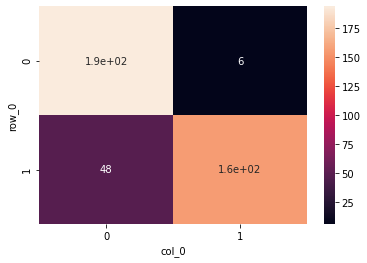

<Figure size 1440x1440 with 0 Axes>

In [202]:
sn.heatmap(confusion_matrix, annot=True)
plt.figure(figsize=(20, 20))
plt.show()

### Problem 1b:  What is the accuracy of this model? Is this a useful measure to evaluate the model?

In [203]:
df['label'].value_counts()

TN    194
TP    155
FN     49
FP      6
Name: label, dtype: int64

In [204]:
true_positive = 155
true_negative = 194
false_negative = 49
false_positive = 6

#### To determine the accuracy:

In [205]:
accuracy = (true_positive + true_negative)/ (true_positive + true_negative + false_negative + false_positive)
print('Accuracy Score :', accuracy) 

Accuracy Score : 0.8638613861386139


While model accuracy is important and useful, I think precision and recall give a more complete picture of model performance. If accurracy, precision, and recall are relatively high and within range of one another, then I think it's safe to say we have a decent model.

### Problem 1c:  Compute FMR, FNMR, Precision, and Recall

In [206]:
precision = true_positive/(true_positive + false_positive)
fmr = 1 - precision
fnmr = false_negative/(true_positive + false_positive)
recall = true_positive/(true_positive + false_negative)

print('Precision Score :', precision) 
print('FMR Score :', fmr)
print('FNMR Score :', fnmr)
print('Recall Score :', recall)

Precision Score : 0.9627329192546584
FMR Score : 0.037267080745341574
FNMR Score : 0.30434782608695654
Recall Score : 0.7598039215686274


### Problem 2a:  How are singularities used in fingerprint recognition?

Singularities are ridgeline patterns within the fingerprint that can yield unique shapes.  We use singularities in order to detect/extract features that can be used to uniquely identify a person by matching with a sample.  In order to perform the comparison, we align the fingerprints based upon a center point.  The center point is typically the highest loop type singularity within the fingerprint.

### Problem 2b:  What is the thinning process in fingerprint feature extraction? And what benefit do they have?

The thinning process is used to aid in the detection of minutiae.  During this process, the ridgelines are reduced in thickness to approximately one pixel.  This is important because it aids in pixel by pixel scanning in order to determine bifurcation and termination points (actually similar to question 4 below).  Without thinning the image, it would be difficult to perform minutiae detection properly.

### Problem 2c:  Why do we need to find local ridge orientation and frequency earlier on in the processing of fingerprint image?

Local ridge orientation determines the angle of the ridges on the fingerprint.  This is important because in order to find the singularities, we need to be able to determine the type of the singularity (whool, loop, delta).  Additionally we need to be able to find the frequency at which singularities occur in order to match against an input(fingerprint).  Finally, I would assume that find the local ridge orientation can help with finding the center point mentioned in 2a as well.

### Problem 3: Perform a singularity detection in the following data. Use the definitions used in week 3 live session slides. Your answer should include all missing values in the table and the type of singularity detected.

In [97]:
problem_3_solution = pd.read_csv("homework1_3.csv")

In [98]:
problem_3_solution.head(10)

k    𝝦    𝝳   𝝙
0  0   80   10  10
1  1   90  170 -10
2  2  260 -210 -30
3  3   50   60  60
4  4  110  160 -20
5  5  270 -140  40
6  6  130   50  50
7  7  180 -100  80

180 degrees = Loop

### Problem 4a: Determine the 3x3 binary pixel grid bifurcation point

Please see included attachments

### Problem 4b: Determine the 3x3 binary pixel grid non-minutuae point

Please see included attachments

### Problem 5: The following image shows the values in grayscale. Perform the necessary steps to detect minutiae points. You don’t need to detect any minutiae centered at the edge. Show your steps. Your result will include the coordinate of detected minutiae points and their types.

Please see included attachments